### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os
import pandas as pd
from tensorflow import keras
from keras import layers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
print(tf.version.VERSION)

2022-12-05 18:06:52.183898: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.10.0


### Untarring and Saving to Local Directory

In [3]:
fullPath = os.path.abspath("./" + "IJB.tar.gz")
data_ijb = keras.utils.get_file("IJB.tar.gz", 'file://'+ fullPath, untar=True, cache_dir=".")
dataset_dir = os.path.join(os.path.dirname(data_ijb), "ijb")

15032385536/15032385536 [==============================] - 51s 0us/step


EOFError: Compressed file ended before the end-of-stream marker was reached

### Creating Dataset from Image Directory

In [2]:
data_dir_1 = "./datasets/face_ijb"
image_size = 256
batch_size = 128
color_bytes = 3

In [3]:
count = 0
for root_dir, cur_dir, files in os.walk(data_dir_1):
    count += len(files)
print('file count:', count)


file count: 15278


In [4]:
# Creating Train Dataset and Test Dataset

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_1,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_size,image_size),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_1,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_size,image_size),
  batch_size=batch_size)

Found 15273 files belonging to 2 classes.
Using 12219 files for training.


2022-12-05 18:07:36.771855: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 15273 files belonging to 2 classes.
Using 3054 files for validation.


In [5]:
# Printing Class Names

class_names = train_ds.class_names
print(class_names)

['faces', 'nonfaces']


### Displaying Sample Data

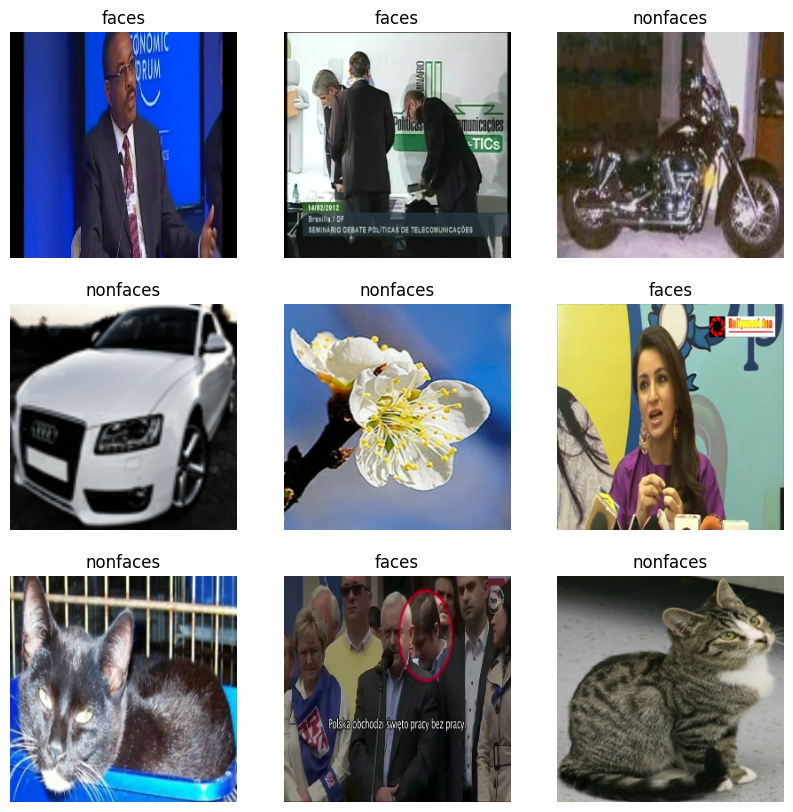

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

In [8]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [9]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [10]:
#result = self.step(batch, self.forward_only)

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

# Save the entire model as a SavedModel.
model.save('saved_model/ijb_model_base')

Epoch 1/10


2022-12-05 18:09:20.363875: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 31 of 1000
2022-12-05 18:09:30.236385: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 67 of 1000
2022-12-05 18:09:36.378347: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


96/96 [==============================] - 277s 3s/step - loss: 0.3995 - accuracy: 0.8450 - val_loss: 0.2470 - val_accuracy: 0.8942
Epoch 2/10
96/96 [==============================] - 252s 3s/step - loss: 0.1044 - accuracy: 0.9632 - val_loss: 0.0874 - val_accuracy: 0.9695
Epoch 3/10
96/96 [==============================] - 257s 3s/step - loss: 0.0525 - accuracy: 0.9811 - val_loss: 0.0670 - val_accuracy: 0.9771
Epoch 4/10
96/96 [==============================] - 247s 3s/step - loss: 0.0367 - accuracy: 0.9872 - val_loss: 0.0702 - val_accuracy: 0.9735
Epoch 5/10
96/96 [==============================] - 251s 3s/step - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.0870 - val_accuracy: 0.9722
Epoch 6/10
96/96 [==============================] - 250s 3s/step - loss: 0.0100 - accuracy: 0.9975 - val_loss: 0.0786 - val_accuracy: 0.9781
Epoch 7/10
96/96 [==============================] - 250s 3s/step - loss: 0.0056 - accuracy: 0.9988 - val_loss: 0.0624 - val_accuracy: 0.9833
Epoch 8/10
96/96 [======

INFO:tensorflow:Assets written to: saved_model/ijb_model_base/assets


INFO:tensorflow:Assets written to: saved_model/ijb_model_base/assets


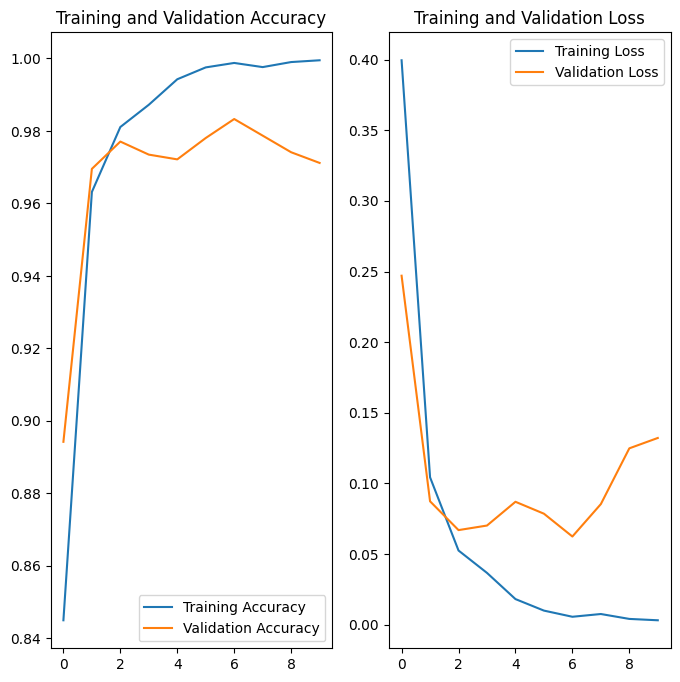

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(256,256,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

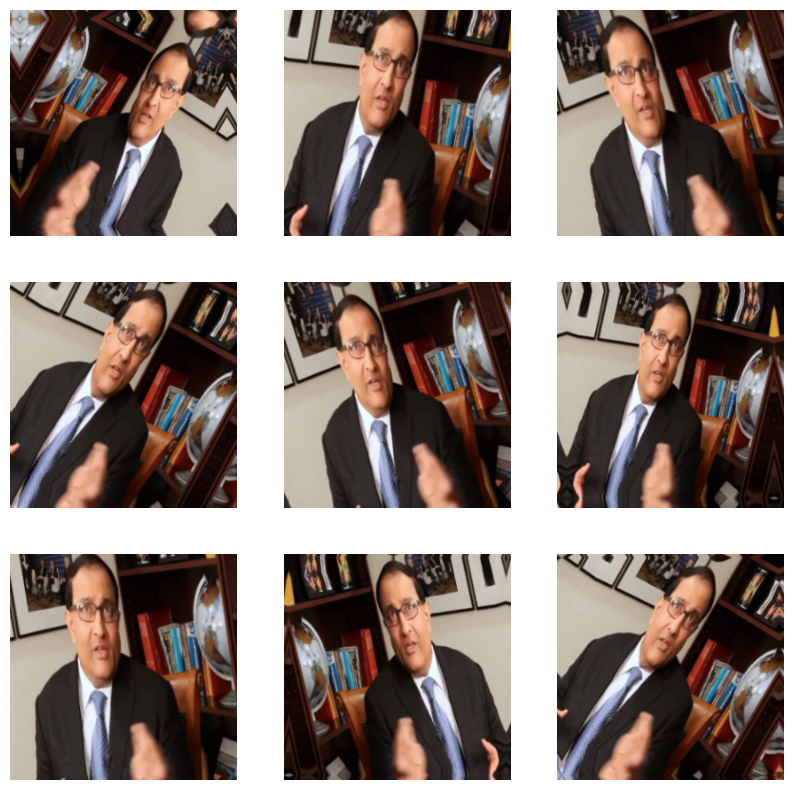

In [14]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [17]:
model_2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [18]:
model_2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [19]:
epochs = 10
history = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
# Save the entire model as a SavedModel.
model_2.save('saved_model/ijb_model_additional')

Epoch 1/10


96/96 [==============================] - 307s 3s/step - loss: 0.6993 - accuracy: 0.6702 - val_loss: 0.4499 - val_accuracy: 0.8608
Epoch 2/10
96/96 [==============================] - 297s 3s/step - loss: 0.2872 - accuracy: 0.8887 - val_loss: 0.3374 - val_accuracy: 0.8998
Epoch 3/10
96/96 [==============================] - 304s 3s/step - loss: 0.1773 - accuracy: 0.9347 - val_loss: 0.1622 - val_accuracy: 0.9466
Epoch 4/10
96/96 [==============================] - 293s 3s/step - loss: 0.1264 - accuracy: 0.9589 - val_loss: 0.1471 - val_accuracy: 0.9551
Epoch 5/10
96/96 [==============================] - 308s 3s/step - loss: 0.1095 - accuracy: 0.9623 - val_loss: 0.2494 - val_accuracy: 0.9283
Epoch 6/10
96/96 [==============================] - 318s 3s/step - loss: 0.1022 - accuracy: 0.9655 - val_loss: 0.1537 - val_accuracy: 0.9617
Epoch 7/10
96/96 [==============================] - 850s 9s/step - loss: 0.1014 - accuracy: 0.9654 - val_loss: 0.1629 - val_accuracy: 0.9565
Epoch 8/10
96/96 [======

INFO:tensorflow:Assets written to: saved_model/lfw_model_additional/assets


INFO:tensorflow:Assets written to: saved_model/lfw_model_additional/assets


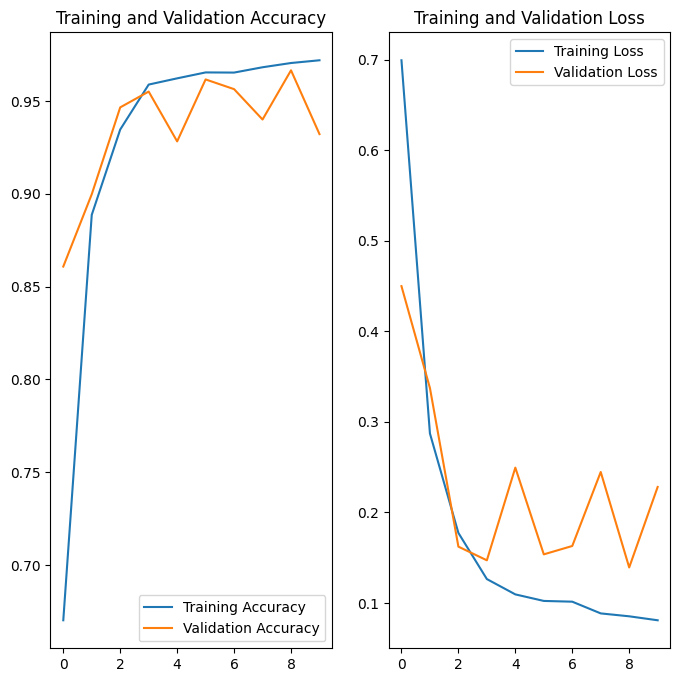

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Testing Model Accuracy

In [21]:
img_url = "https://img.freepik.com/free-photo/portrait-white-man-isolated_53876-40306.jpg"
img_path = tf.keras.utils.get_file('test_img_3', origin=img_url)

img = tf.keras.utils.load_img(
    img_path, target_size=(image_size, image_size)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

img_url = "https://images.unsplash.com/photo-1484591974057-265bb767ef71?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxleHBsb3JlLWZlZWR8MXx8fGVufDB8fHx8&w=1000&q=80"
img_path = tf.keras.utils.get_file('test_img_4', origin=img_url)

img = tf.keras.utils.load_img(
    img_path, target_size=(image_size, image_size)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 301ms/step
[[ 1.9706731 -8.686133 ]]
This image most likely belongs to faces with a 100.00 percent confidence.
1/1 [==============================] - 0s 34ms/step
[[-7.3838706  4.997526 ]]
This image most likely belongs to nonfaces with a 100.00 percent confidence.
